In [15]:
import matplotlib.pyplot as plt
from quantopian.interactive.data.sentdex import sentiment

In [16]:
from quantopian.pipeline.filters.morningstar import Q1500US

In [17]:
BAC=symbols('BAC').sid
bac_sentiment=sentiment[(sentiment.sid==BAC)]

In [18]:
bac_sentiment.head()

symbol  sentiment_signal  sid  asof_date  timestamp
0    BAC               6.0  700 2012-11-14 2012-11-15
1    BAC               1.0  700 2012-11-15 2012-11-16
2    BAC              -1.0  700 2012-11-16 2012-11-17
3    BAC              -1.0  700 2012-11-17 2012-11-18
4    BAC              -1.0  700 2012-11-18 2012-11-19
5    BAC               6.0  700 2012-11-19 2012-11-20
6    BAC               6.0  700 2012-11-20 2012-11-21
7    BAC               6.0  700 2012-11-21 2012-11-22
8    BAC               6.0  700 2012-11-22 2012-11-23
9    BAC               6.0  700 2012-11-23 2012-11-24

In [19]:
bac_sentiment.peek()

symbol  sentiment_signal  sid  asof_date  timestamp
0     BAC               6.0  700 2012-11-14 2012-11-15
1     BAC               1.0  700 2012-11-15 2012-11-16
2     BAC              -1.0  700 2012-11-16 2012-11-17
3     BAC              -1.0  700 2012-11-17 2012-11-18
4     BAC              -1.0  700 2012-11-18 2012-11-19
5     BAC               6.0  700 2012-11-19 2012-11-20
6     BAC               6.0  700 2012-11-20 2012-11-21
7     BAC               6.0  700 2012-11-21 2012-11-22
8     BAC               6.0  700 2012-11-22 2012-11-23
9     BAC               6.0  700 2012-11-23 2012-11-24
10    BAC               6.0  700 2012-11-24 2012-11-25

In [20]:
import blaze

In [21]:
bac_sentiment=blaze.compute(bac_sentiment)

In [22]:
bac_sentiment.set_index('asof_date',inplace=True)

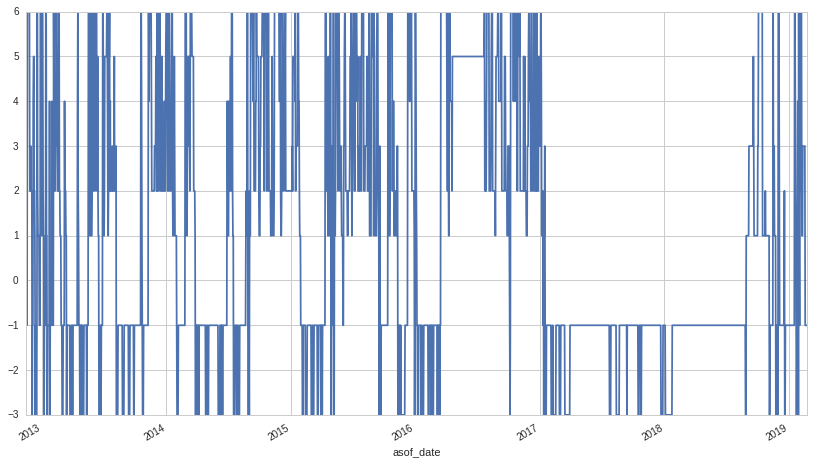

In [24]:
bac_sentiment["sentiment_signal"].plot()
plt.show()

In [25]:
bac_sentiment=bac_sentiment[(bac_sentiment.index>"2016-06-01")]

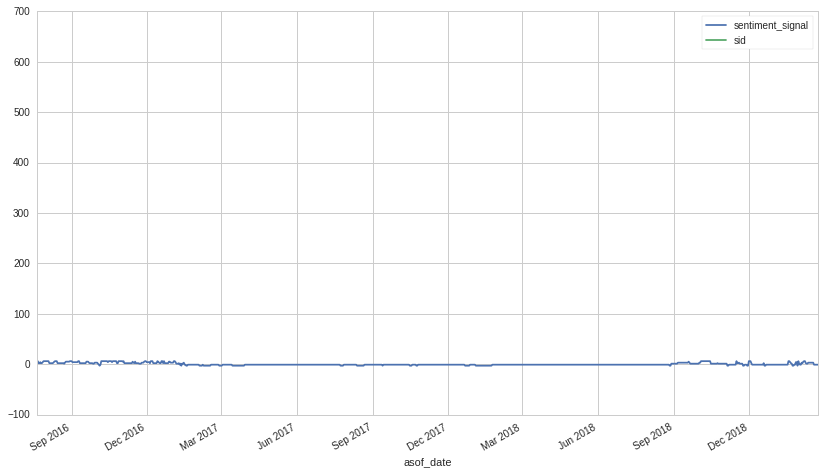

In [26]:
bac_sentiment.plot()

In [27]:
bac_sentiment.head()

symbol  sentiment_signal  sid                  timestamp
asof_date                                                          
2016-07-21    BAC               5.0  700 2016-07-22 04:00:55.899277
2016-07-22    BAC               6.0  700 2016-07-23 04:00:57.934982
2016-07-23    BAC               2.0  700 2016-07-24 03:00:57.478401
2016-07-24    BAC               2.0  700 2016-07-25 03:00:52.295698
2016-07-25    BAC               4.0  700 2016-07-26 04:00:51.902133

In [36]:
Q1500US(symbols('BAC').sid)

PrecomputedFilter(NumExprFilter(...), name='QUS___mcap_700__size_1500__version_3')

In [4]:
from quantopian.pipeline import Pipeline

In [5]:
def make_pipeline():
    return Pipeline()

In [12]:
from quantopian.research import run_pipeline
results=run_pipeline(make_pipeline(),start_date='2015-05-05',end_date='2015-05-05')

In [16]:
results.head()

Empty DataFrame
Columns: []
Index: [(2015-05-05 00:00:00+00:00, Equity(2 [ARNC])), (2015-05-05 00:00:00+00:00, Equity(21 [AAME])), (2015-05-05 00:00:00+00:00, Equity(24 [AAPL])), (2015-05-05 00:00:00+00:00, Equity(25 [ARNC_PR])), (2015-05-05 00:00:00+00:00, Equity(31 [ABAX]))]

In [1]:
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.filters.morningstar import Q1500US
from quantopian.pipeline.data.sentdex import sentiment

def make_pipeline():
    
    #Factor returns 
    sentiment_factor = sentiment.sentiment_signal.latest
    
    # Our universe is made up of stocks that have a non-null sentiment signal that was updated in
    # the last day, are not within 2 days of an earnings announcement, are not announced acquisition
    # targets, and are in the Q1500US.
    universe = (Q1500US() 
                & sentiment_factor.notnull())
    
    # A classifier to separate the stocks into quantiles based on sentiment rank.

    
    # Go short the stocks in the 0th quantile, and long the stocks in the 2nd quantile.
    pipe = Pipeline(
        columns={
            'sentiment': sentiment_factor,
            'longs': (sentiment_factor >=4),
            'shorts': (sentiment_factor<=2),
        },
        screen=universe
    )
    
    return pipe
    

In [20]:
results=run_pipeline(make_pipeline(),start_date='2015-01-01',end_date='2016-01-01')

In [21]:
results

longs  sentiment shorts
2015-01-02 00:00:00+00:00 Equity(2 [ARNC])        False        2.0   True
                          Equity(24 [AAPL])       False        2.0   True
                          Equity(62 [ABT])        False        1.0   True
                          Equity(67 [ADSK])        True        6.0  False
                          Equity(76 [TAP])        False       -3.0   True
                          Equity(114 [ADBE])      False        2.0   True
                          Equity(122 [ADI])       False       -1.0   True
                          Equity(128 [ADM])       False       -1.0   True
                          Equity(161 [AEP])       False       -1.0   True
                          Equity(166 [AES])       False        3.0  False
                          Equity(168 [AET])       False        1.0   True
                          Equity(185 [AFL])        True        6.0  False
                          Equity(216 [HES])        True        5.0  False
                          Equity(239 [AIG])       False        1.0   True
                          Equity(328 [ALTR])      False        2.0   True
                          Equity(337 [AMAT])      False       -1.0   True
                          Equity(351 [AMD])        True        6.0  False
                          Equity(357 [TWX])       False        1.0   True
                          Equity(368 [AMGN])      False        2.0   True
                          Equity(410 [AN])        False        2.0   True
                          Equity(430 [ANN])       False       -1.0   True
                          Equity(438 [AON])       False        2.0   True
                          Equity(448 [APA])       False       -3.0   True
                          Equity(455 [APC])       False        2.0   True
                          Equity(460 [APD])       False        2.0   True
                          Equity(465 [APH])       False       -1.0   True
                          Equity(510 [ARG])       False        2.0   True
                          Equity(595 [GAS])       False       -1.0   True
                          Equity(630 [ADP])       False       -1.0   True
                          Equity(660 [AVP])       False       -3.0   True
...                                                 ...        ...    ...
2016-01-04 00:00:00+00:00 Equity(36372 [SNI])      True        6.0  False
                          Equity(36930 [DISC_A])   True        6.0  False
                          Equity(38084 [MJN])     False       -1.0   True
                          Equity(38936 [DG])      False       -1.0   True
                          Equity(39546 [LYB])     False        2.0   True
                          Equity(39626 [EXPR])    False        3.0  False
                          Equity(39778 [QEP])     False       -1.0   True
                          Equity(39840 [TSLA])    False       -3.0   True
                          Equity(40430 [GM])      False       -1.0   True
                          Equity(40852 [KMI])     False       -3.0   True
                          Equity(41451 [LNKD])    False        2.0   True
                          Equity(41462 [MOS])     False       -1.0   True
                          Equity(41579 [P])       False        2.0   True
                          Equity(41636 [MPC])     False        3.0  False
                          Equity(42023 [XYL])     False       -1.0   True
                          Equity(42118 [GRPN])     True        6.0  False
                          Equity(42173 [APTV])    False       -1.0   True
                          Equity(42230 [TRIP])    False       -1.0   True
                          Equity(42251 [WPX])     False       -1.0   True
                          Equity(42270 [CPRI])    False       -1.0   True
                          Equity(42277 [ZNGA])    False        2.0   True
                          Equity(42788 [PSX])     False       -1.0   True
                          Equity(42950 [FB])      Fals

In [23]:
assets = results.index.levels[1].unique()
pricing = get_pricing(assets, start_date='2014-12-01', end_date='2016-02-01', fields='open_price')

Dropped 0.1% entries from factor data: 0.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Quantiles Statistics


min  max      mean       std  count   count %
factor_quantile                                               
1               -3.0  1.0 -1.519115  0.944756  79416  61.97935
2                1.0  6.0  3.253936  1.919192  48717  38.02065

Returns Analysis


1D     5D    10D
Ann. alpha                                     0.015  0.024  0.022
beta                                          -0.006 -0.030 -0.042
Mean Period Wise Return Top Quantile (bps)     0.736  1.055  1.091
Mean Period Wise Return Bottom Quantile (bps) -0.371 -0.534 -0.533
Mean Period Wise Spread (bps)                  1.106  1.584  1.618

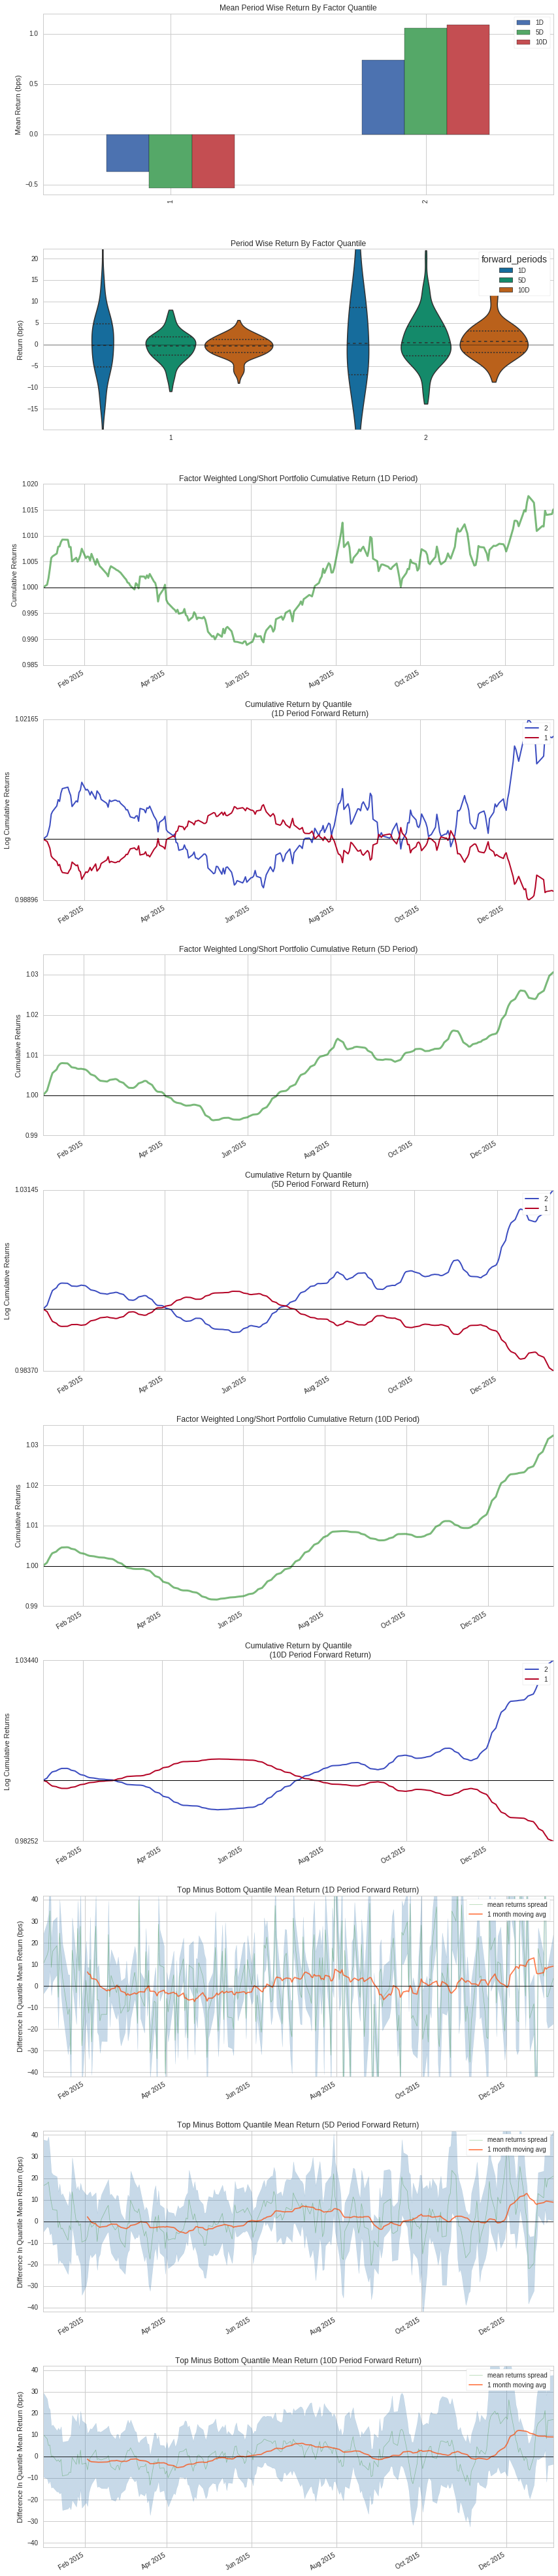

Information Analysis


1D     5D    10D
IC Mean           0.005  0.015  0.020
IC Std.           0.060  0.061  0.059
Risk-Adjusted IC  0.088  0.237  0.344
t-stat(IC)        1.405  3.771  5.473
p-value(IC)       0.161  0.000  0.000
IC Skew          -0.048 -0.137 -0.035
IC Kurtosis       0.214 -0.286 -0.515

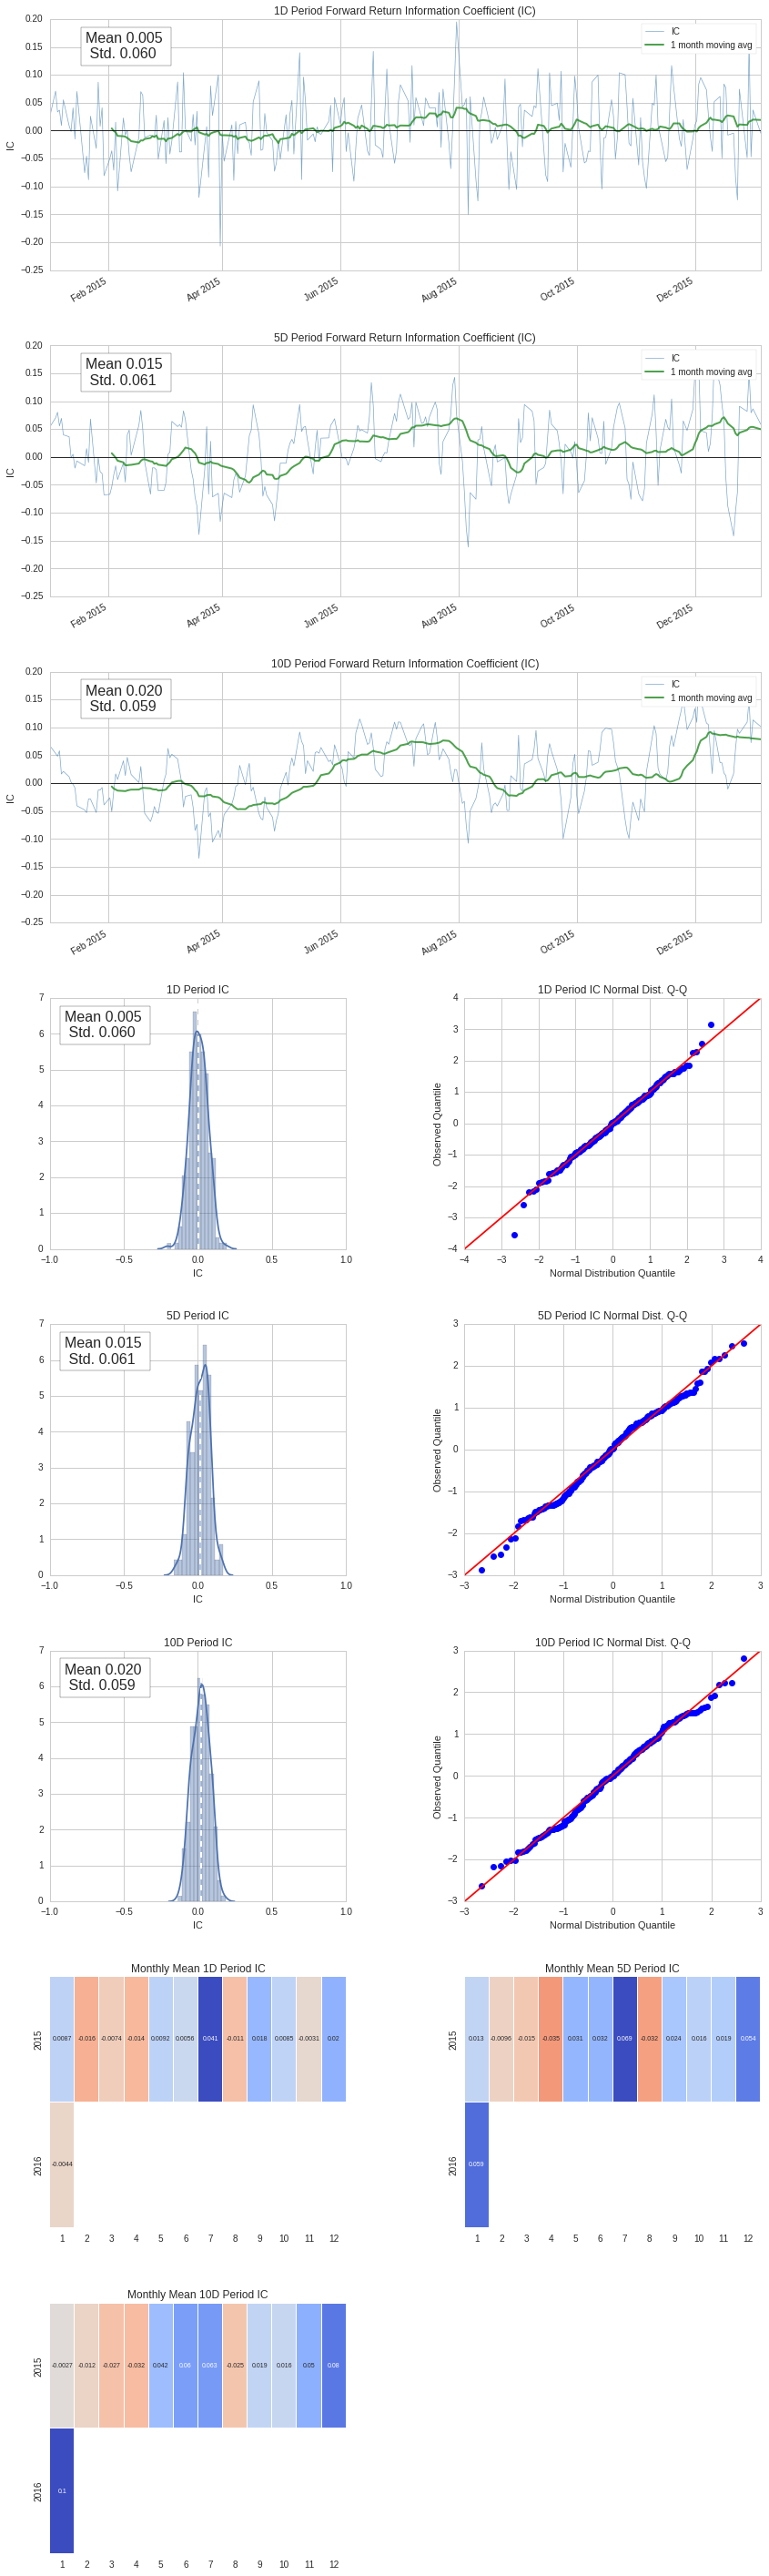

Turnover Analysis


10D     1D     5D
Quantile 1 Mean Turnover   0.117  0.031  0.081
Quantile 2 Mean Turnover   0.188  0.050  0.132

1D     5D    10D
Mean Factor Rank Autocorrelation  0.894  0.725  0.615

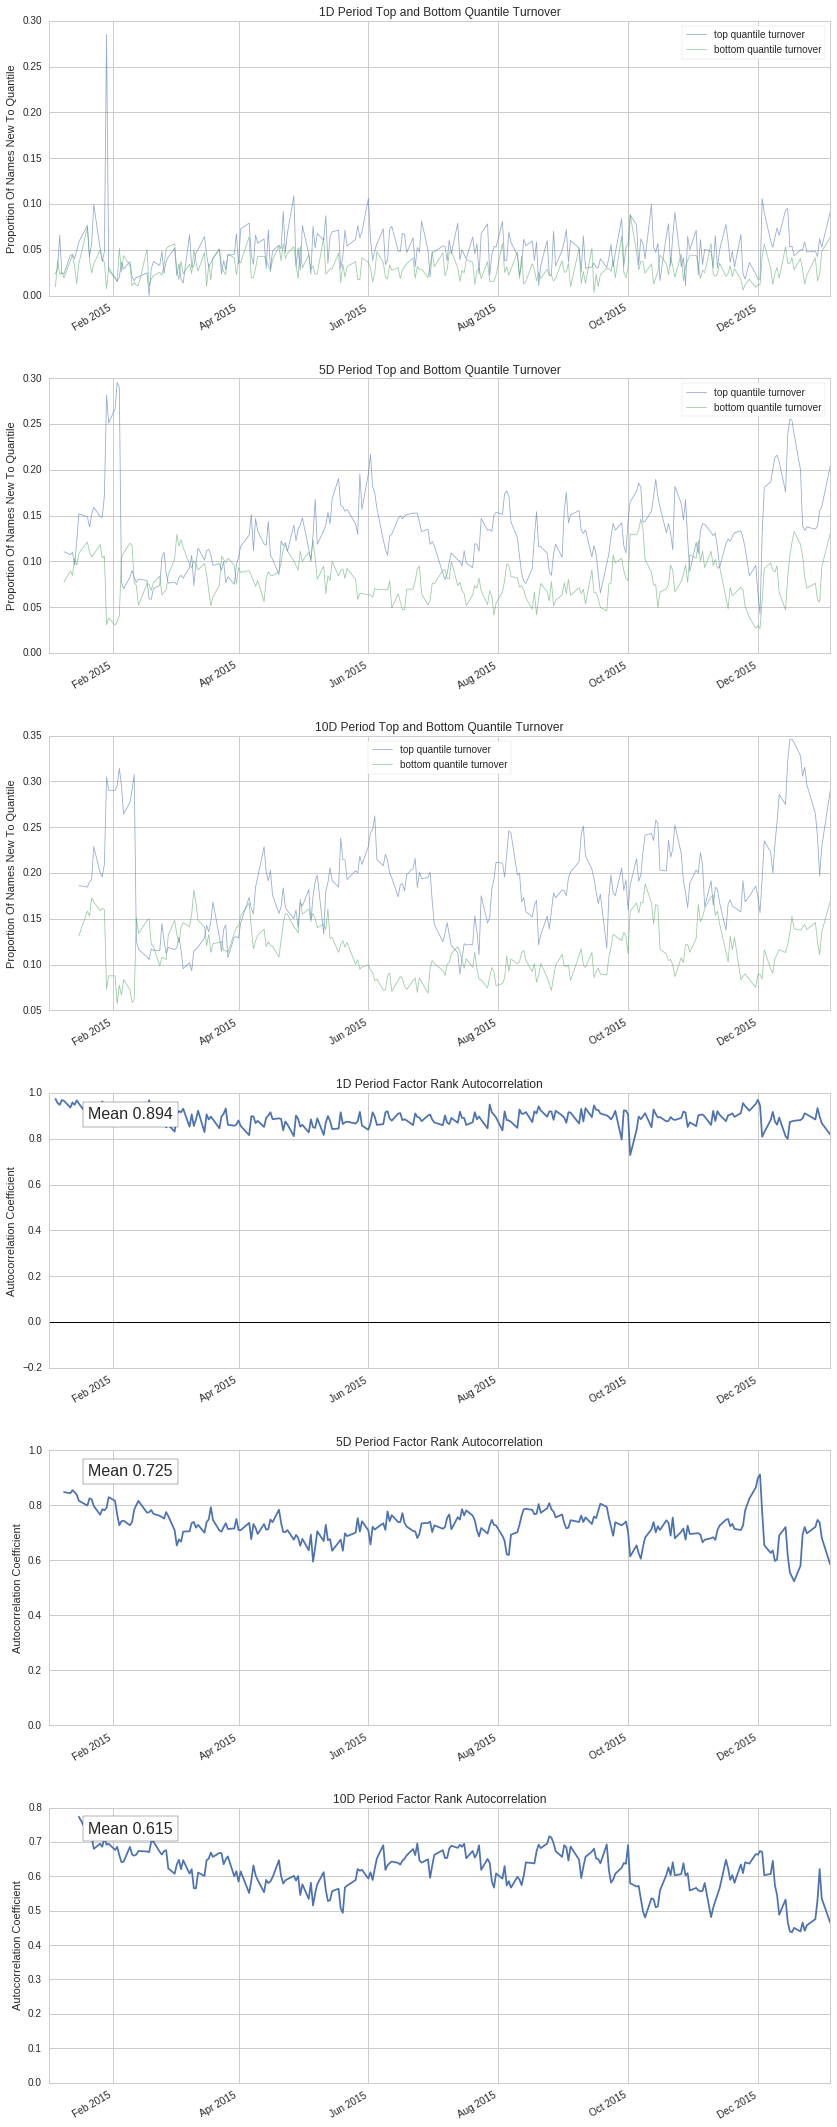

In [30]:
import alphalens
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor = results['sentiment'], prices = pricing, quantiles = 2, periods = (1,5,10))

alphalens.tears.create_full_tear_sheet(factor_data)  


In [1]:
bt=get_backtest("5c9e5928d7042d4b774177c5")

100% Time: 0:00:32|###########################################################|


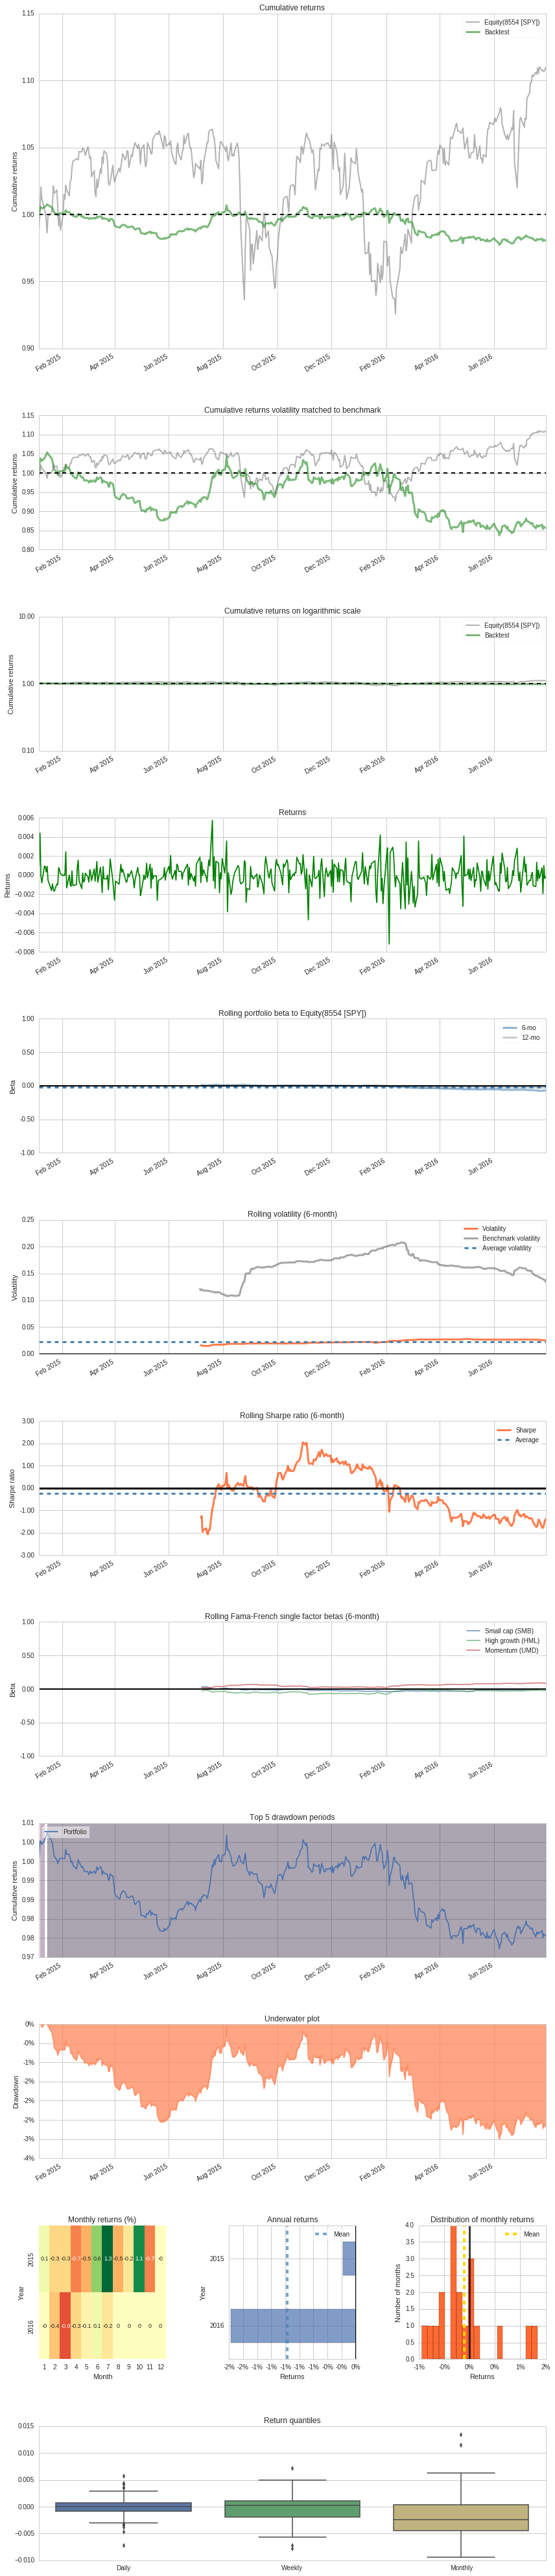

/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


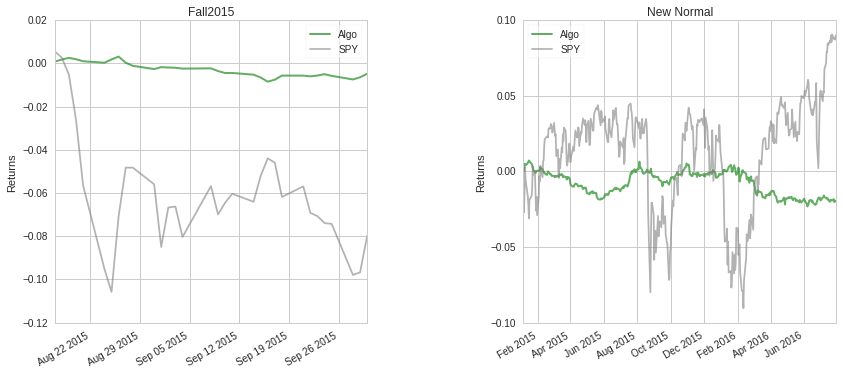

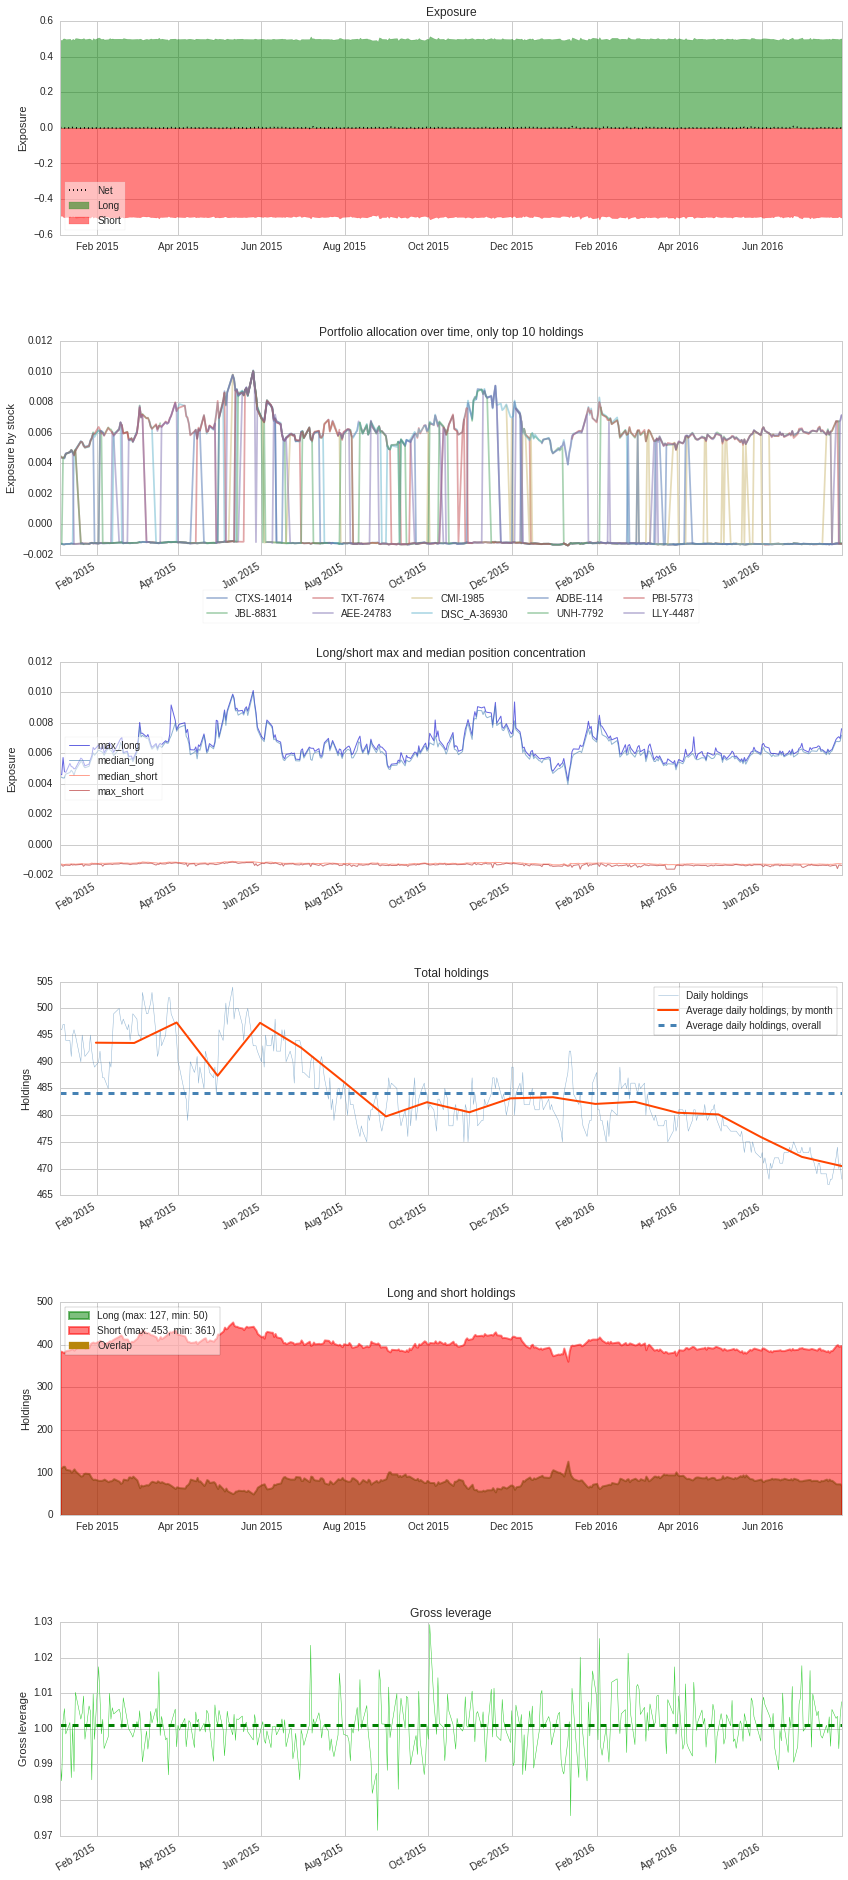

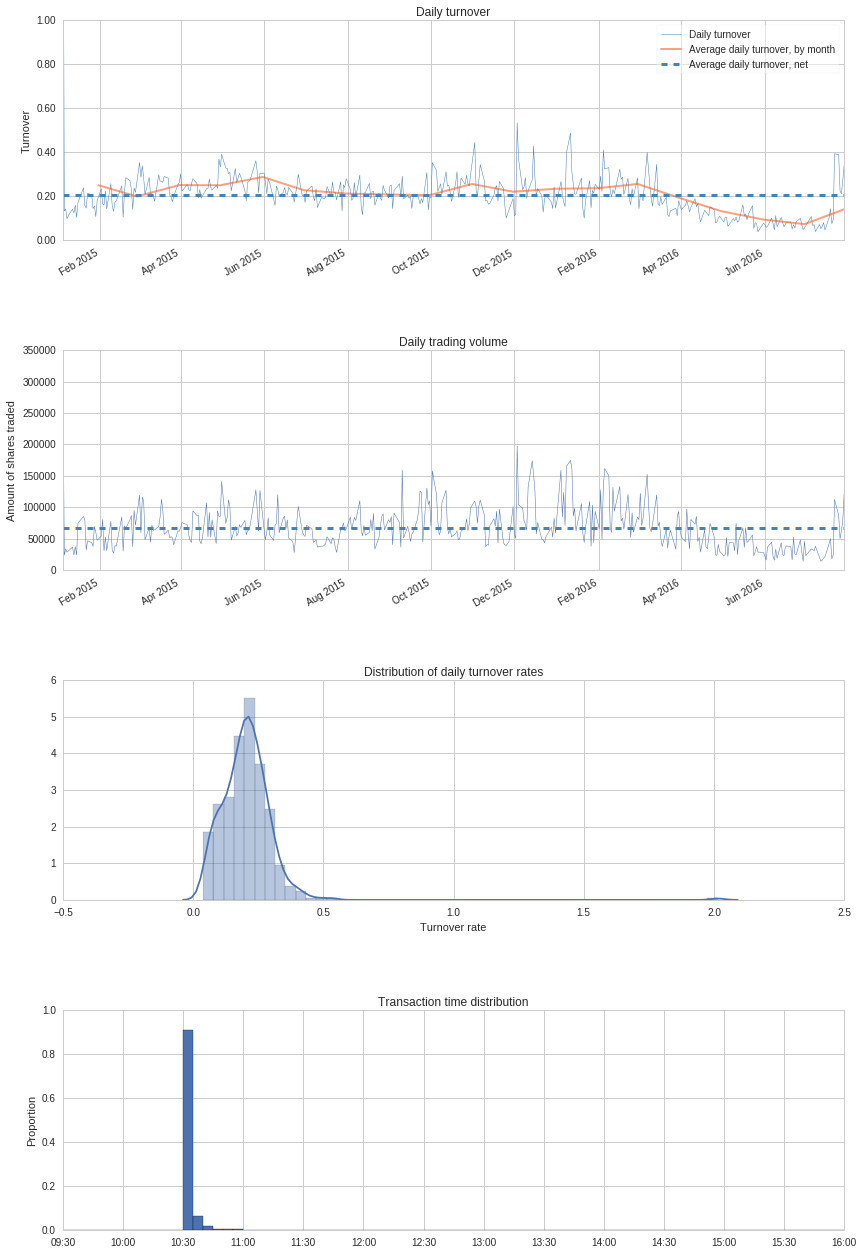

## Performance Relative to Common Risk Factors

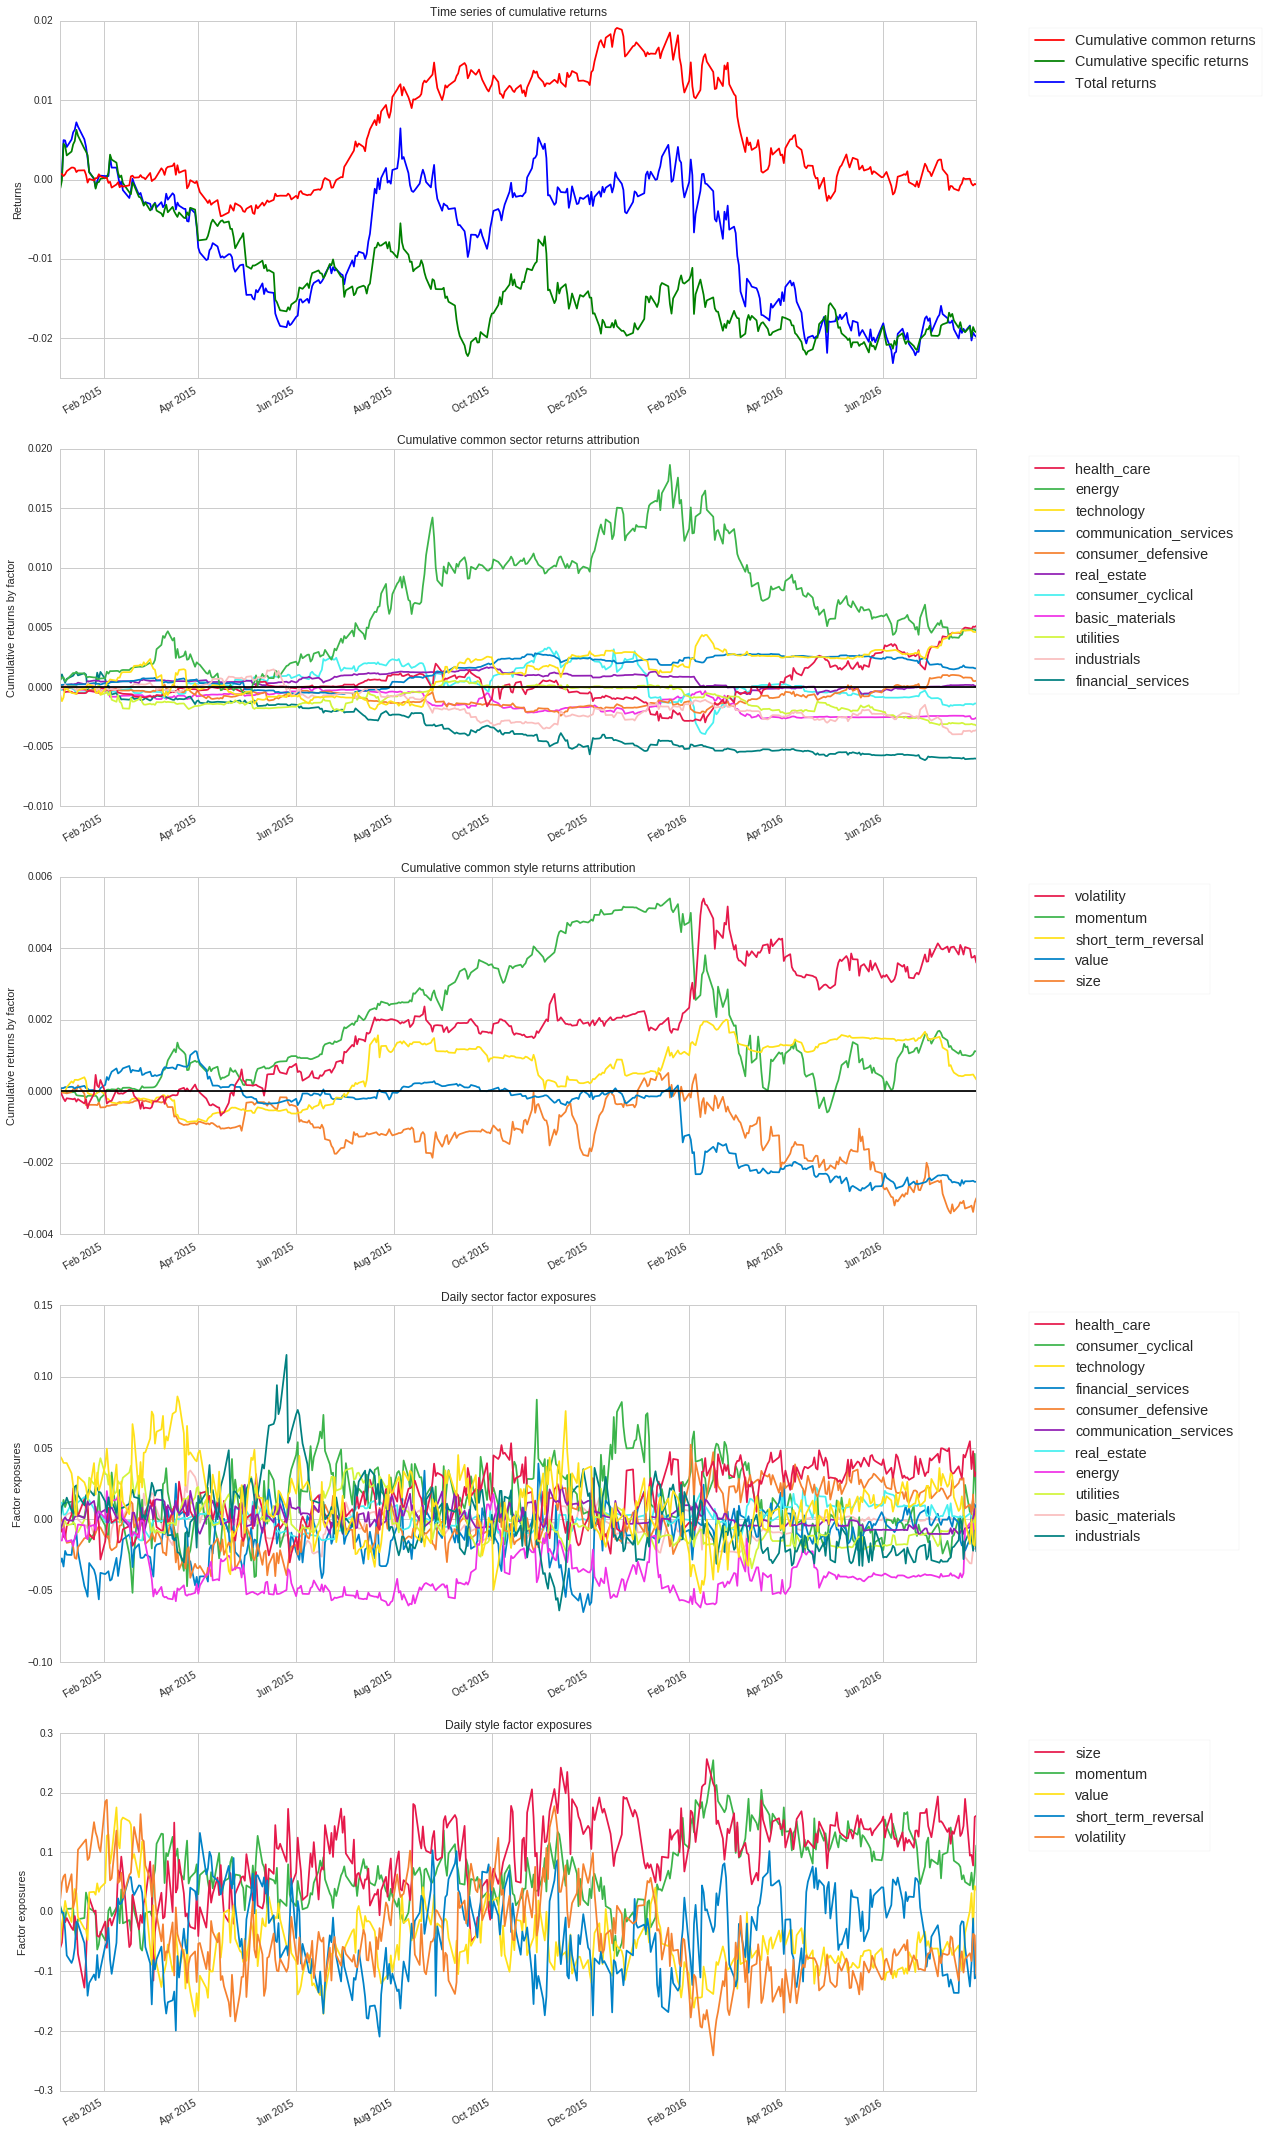

In [2]:
bt.create_full_tear_sheet()